# Credit Card Fraud Detection 

**Importing libraries/Visualizing and understanding the data**

In [56]:
#importing required packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [57]:
df = pd.read_csv('card.csv')

In [58]:
#first 5 rows
df.head(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0  

[5 rows x 31 columns]

In [59]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
#summary 
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

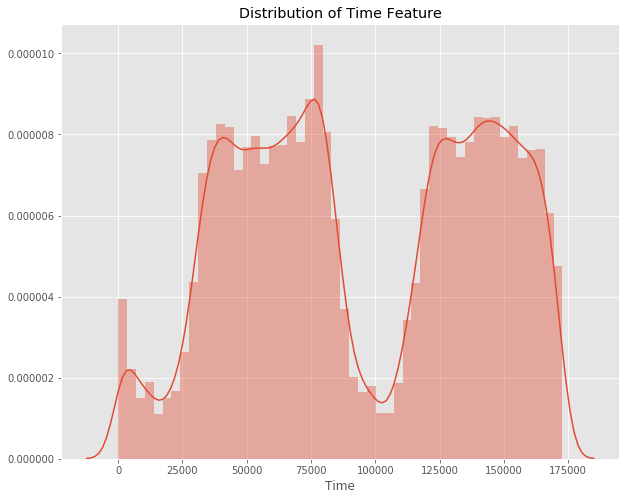

In [12]:
#Time and Amount visualization
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

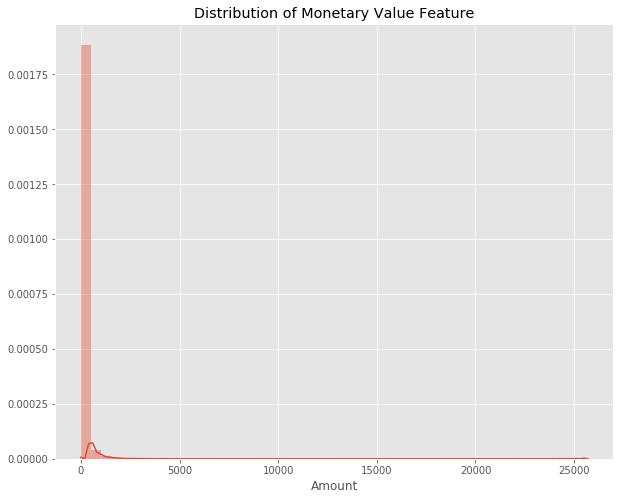

In [13]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

**Number of fraud and normal transactions** 

In [14]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

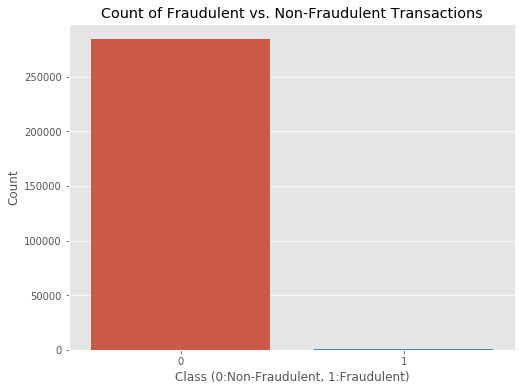

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

**Correlation**

Text(0.5, 1, 'Heatmap of Correlation')

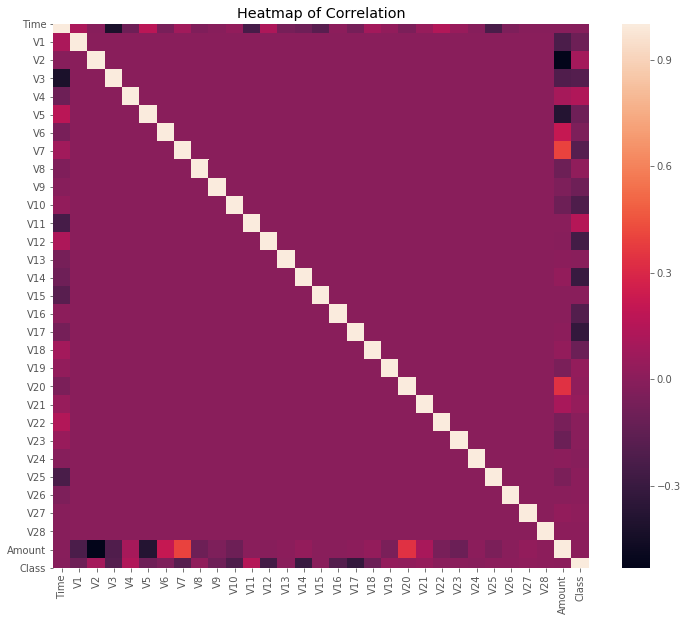

In [62]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [18]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [20]:
#scaling amount
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [21]:
#concatenating newly created columns
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
283946  172024.0 -0.989  1.368 -0.541 -0.510 -0.184 -1.140  0.319  0.572   
82181    59281.0 -3.223  1.013 -0.245 -1.647 -0.466 -0.624  0.301 -0.153   
155583  105830.0 -0.234  0.426  0.852  3.008  0.774  0.655  0.480  0.115   
228126  145368.0 -0.415 -1.100 -0.682 -3.728 -0.265 -0.905  1.901 -0.615   
31145    36232.0  1.107  0.047  0.975  1.474 -0.688 -0.186 -0.289  0.152   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
283946 -0.294  ...  0.242 -0.012 -0.455  0.123 -0.243 -0.074    9.51      0   
82181   1.105  ... -0.350 -0.488  0.513  0.159 -2.341 -0.625   35.60      0   
155583 -0.077  ...  0.647 -0.482 -2.096 -0.411  0.309  0.381  142.63      0   
228126 -0.168  ...  0.334 -0.539  0.050 -0.809 -0.051 -0.032  290.95      0   
31145   0.644  ...  0.194  0.343  0.210 -0.612  0.055  0.031    9.90      0   

        scaled_amount  scaled_time  
283946         -0.315        1.626  
82181          -0.211       -0.748  
155583          0.217        0.232  
228126          0.810        1.065  
31145          -0.314       -1.234  

[5 rows x 33 columns]

In [22]:
#dropping old columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [23]:
#train test split 
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256209, 31)
Test Shape: (28598, 31)


In [24]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [25]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 446 fraudulent transactions in the train data.


In [26]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [27]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
46283  -2.124 -0.968  2.730  1.652  2.272 -0.108 -0.746  0.504 -0.976  0.385   
16302  -2.979  2.330 -2.318  1.142 -1.720 -1.378 -0.523  1.839 -0.497  0.277   
175513  2.130 -1.316  0.169 -0.863 -1.646  0.085 -1.841  0.289  0.870  0.718   
123851  0.954 -1.308 -0.213 -0.307 -1.107 -0.563 -0.162 -0.094 -0.513  0.542   
56730  -0.878  0.133  2.416 -0.105 -0.553 -0.338  0.176  0.212  0.489 -0.934   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
46283   ...  0.625  0.011 -0.318  0.282  0.039 -0.177 -0.133      0   
16302   ...  0.344  0.003  0.402 -0.474 -0.392  0.375 -0.012      0   
175513  ...  1.167  0.255  0.664 -0.459 -0.113  0.045 -0.030      0   
123851  ... -0.854 -0.137  0.082  0.214  1.106 -0.106  0.027      0   
56730   ... -0.006  0.019  0.386 -0.126  0.175  0.051  0.119      0   

        scaled_amount  scaled_time  
46283          -0.311       -1.051  
16302           0.007       -1.382  
175513         -0.337        0.759  
123851          0.518       -0.265  
56730          -0.093       -0.933  

[5 rows x 31 columns]

In [28]:
#concatenating both into a subsample data set 
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [29]:
subsample = pd.concat([selected, fraud])
len(subsample)

892

In [30]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1      V2      V3     V4      V5     V6      V7      V8     V9    V10  \
0   2.067  -0.079  -1.295  0.353  -0.081 -1.227   0.142  -0.318  0.748  0.024   
1  -4.402  -1.255  -0.579  0.663   1.524 -1.762  -1.247  -0.625  0.520  1.287   
2  -2.468  -2.395   1.903 -1.421   1.363 -0.198  -1.205   0.359 -0.434 -0.059   
3 -17.275  10.820 -20.364  6.047 -13.465 -4.167 -14.409  11.581 -4.074 -9.153   
4 -15.904  10.394 -19.134  6.186 -12.538 -4.027 -13.898  10.662 -2.845 -9.669   
5   0.065  -0.305  -0.577 -1.482   2.462  3.810  -0.611   1.132  0.512 -0.553   
6  -1.757   3.267  -4.153  3.925  -1.754 -1.006  -4.313   1.561 -3.296 -6.213   
7  -0.352   0.672   1.592 -0.167  -0.209 -0.714   0.472  -0.003 -0.698 -0.256   
8  -3.897   4.518  -4.454  5.547  -4.121 -1.163  -6.805   2.928 -4.917 -6.600   
9   1.328  -0.422   0.291 -0.577  -1.122 -1.023  -0.696   0.022 -0.836  0.432   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ...  0.872  0.007 -0.065  0.224 -0.092 -0.018 -0.060      0         -0.349   
1  ... -1.054 -2.167  0.227 -0.906  0.285  0.708 -1.381      0         -0.318   
2  ...  0.948  0.854 -1.314  0.933  0.030  0.076  0.039      0         -0.341   
3  ... -1.208 -0.727  0.113  1.119 -0.233  1.684  0.504      1          0.047   
4  ... -1.280 -0.601  0.040  0.996 -0.274  1.688  0.528      1          0.047   
5  ...  0.883  0.099  0.755 -0.729  0.501  0.079  0.056      0         -0.266   
6  ...  0.053 -0.368 -0.776  0.292  0.026  1.063  0.501      1         -0.349   
7  ...  0.171 -0.042  0.591 -0.528  0.727  0.058  0.122      0         -0.296   
8  ...  0.920 -0.151  0.011  0.080  0.412  0.636  0.501      1         -0.335   
9  ... -0.519  0.145  0.386  0.120 -0.505  0.007  0.033      0         -0.293   

   scaled_time  
0        1.398  
1        1.066  
2       -0.820  
3       -1.465  
4       -1.466  
5        1.464  
6       -0.195  
7       -1.172  
8       -1.240  
9       -0.873  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

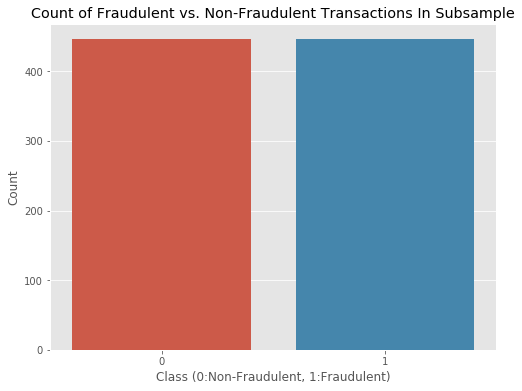

In [31]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [32]:
#new correlation
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.447
V2             0.492
V3            -0.569
V4             0.704
V5            -0.377
V6            -0.391
V7            -0.481
V8             0.058
V9            -0.564
V10           -0.631
V11            0.693
V12           -0.686
V13           -0.099
V14           -0.753
V15           -0.088
V16           -0.602
V17           -0.568
V18           -0.476
V19            0.260
V20            0.181
V21            0.133
V22           -0.009
V23           -0.027
V24           -0.133
V25            0.045
V26            0.032
V27            0.071
V28            0.101
Class          1.000
scaled_amount  0.090
scaled_time   -0.170

In [33]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.569
V9  -0.564
V10 -0.631
V12 -0.686
V14 -0.753
V16 -0.602
V17 -0.568

In [34]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.704
V11    0.693
Class  1.000

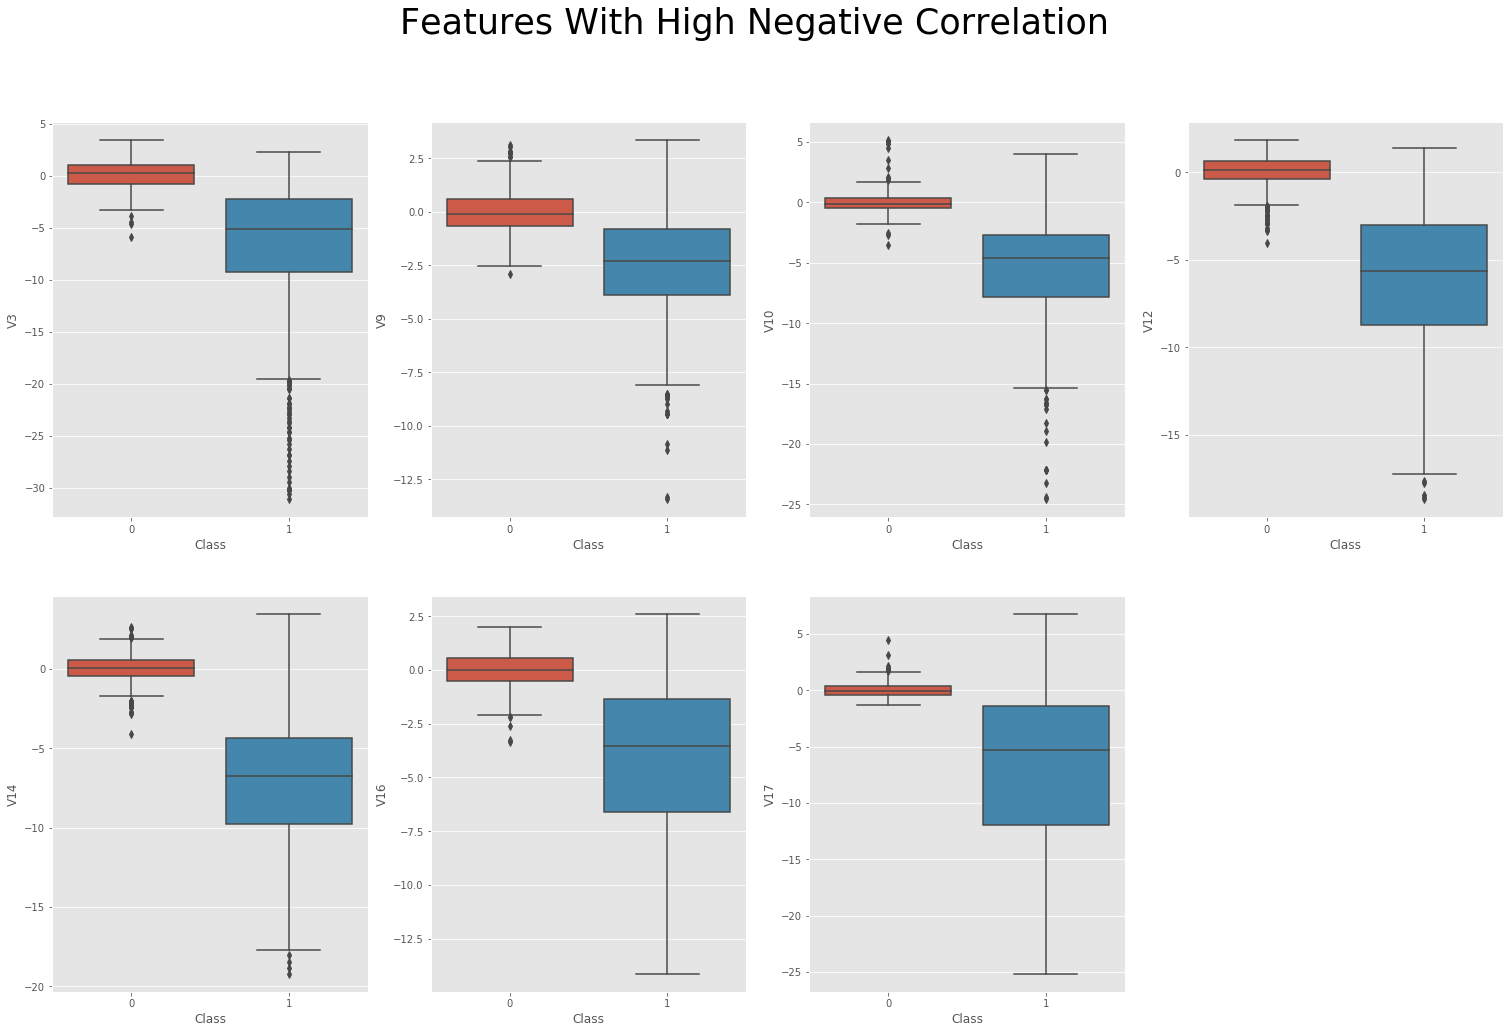

In [35]:
#visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

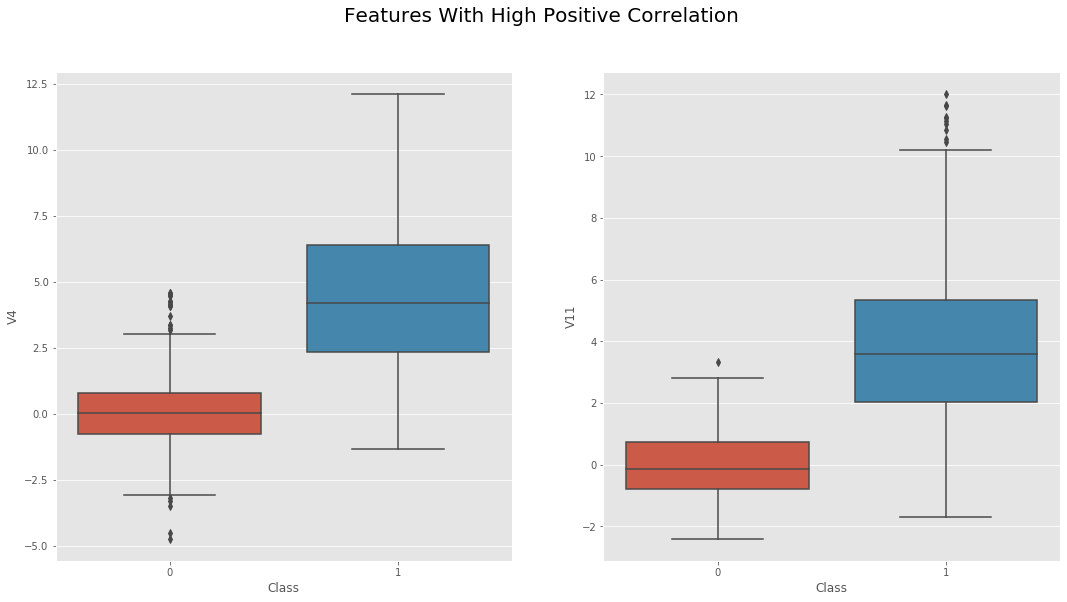

In [36]:
#visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Removing outliers**

In [37]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [38]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 892 transactions by 274 transactions to 618 transactions.


In [39]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [40]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

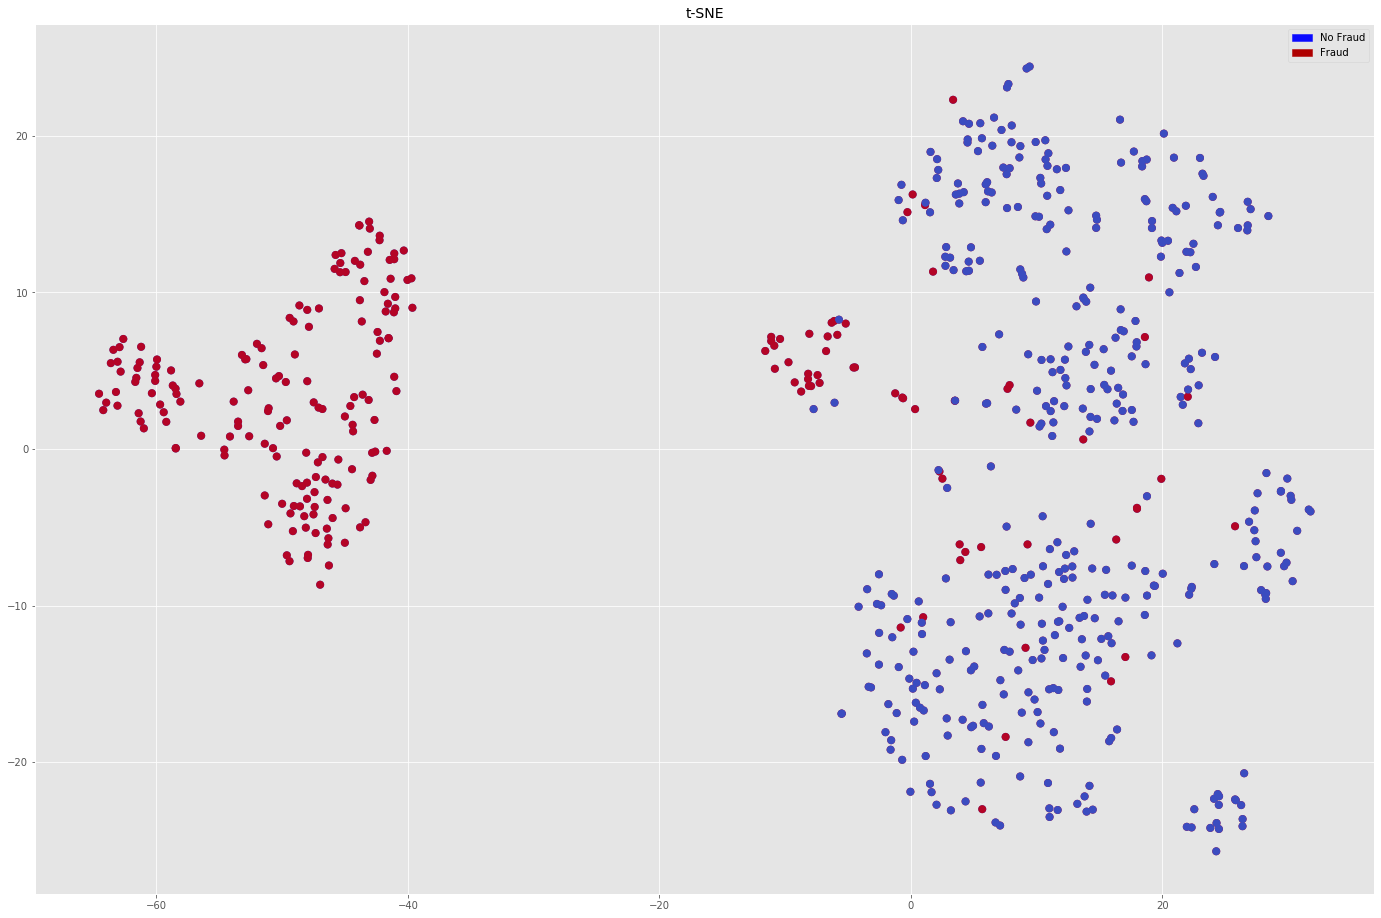

In [41]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [43]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [45]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (494, 30) (124, 30) 

Y_shapes:
 Y_train: Y_validation:
 (494,) (124,)


In [46]:
!pip install xgboost

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.956414 (0.022867)
LDA: 0.953818 (0.021566)
KNN: 0.940991 (0.026749)
CART: 0.868953 (0.065355)
SVM: 0.941819 (0.036005)
XGB: 0.967238 (0.016550)
RF: 0.940375 (0.039089)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

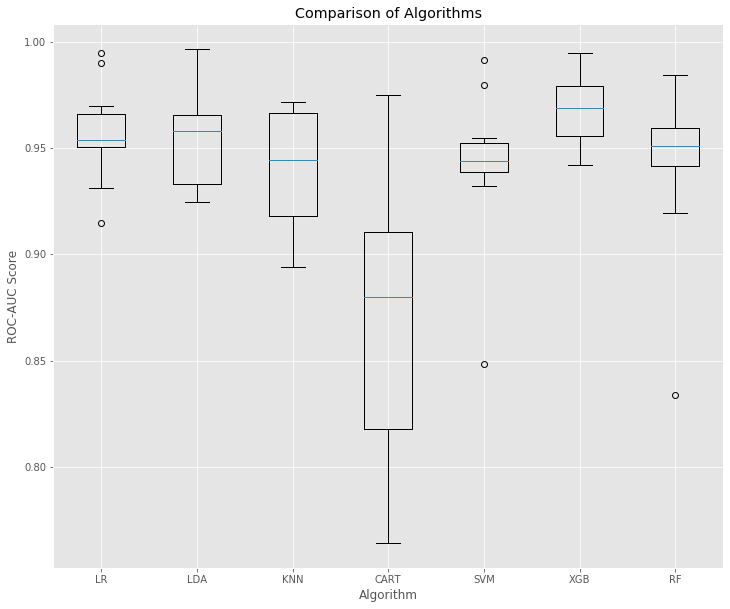

In [65]:
#Comparing Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [50]:
#visualizing RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')